# Homework SVM

Mark Deutsch 
10/22/2019
ABE 516X

In this homework, I implement SVM on a dataset of my choice. The dataset I chose is about divorces. Researchers asked married
and divorced couples to answer 54 questions on a scale of 0-4. The study also recorded the class, divorced or married. 
Class = 1 means the couple is divorced. Class = 0 means the couple is divorced. The attributes in this dataset are the questions that were asked to the couple. The goal of this homework assignment is to
use machine learning to predict if a couple is divorced or married based on the answers to these questions. 
The questions are:
1. When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend. 
2. I know we can ignore our differences, even if things get hard sometimes. 
3. When we need it, we can take our discussions with my wife from the beginning and correct it. 
4. When I argue with my wife, it will eventually work for me to contact him. 
5. The time I spent with my wife is special for us. 
6. We don't have time at home as partners. 
7. We are like two strangers who share the same environment at home rather than family. 
8. I enjoy our holidays with my wife. 
9. I enjoy traveling with my wife. 
10. My wife and most of our goals are common. 
11. I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other. 
12. My wife and I have similar values in terms of personal freedom. 
13. My husband and I have similar entertainment. 
14. Most of our goals for people (children, friends, etc.) are the same. 
15. Our dreams of living with my wife are similar and harmonious 
16. We're compatible with my wife about what love should be 
17. We share the same views with my wife about being happy in your life 
18. My wife and I have similar ideas about how marriage should be 
19. My wife and I have similar ideas about how roles should be in marriage 
20. My wife and I have similar values in trust 
21. I know exactly what my wife likes. 
22. I know how my wife wants to be taken care of when she's sick. 
23. I know my wife's favorite food. 
24. I can tell you what kind of stress my wife is facing in her life. 
25. I have knowledge of my wife's inner world. 
26. I know my wife's basic concerns. 
27. I know what my wife's current sources of stress are. 
28. I know my wife's hopes and wishes. 
29. I know my wife very well. 
30. I know my wife's friends and their social relationships. 
31. I feel aggressive when I argue with my wife. 
32. When discussing with my wife, I usually use expressions such as â€œyou alwaysâ€œ or â€œyou neverâ€. 
33. I can use negative statements about my wife's personality during our discussions. 
34. I can use offensive expressions during our discussions. 
35. I can insult our discussions. 
36. I can be humiliating when we argue. 
37. My argument with my wife is not calm. 
38. I hate my wife's way of bringing it up. 
39. Fights often occur suddenly. 
40. We're just starting a fight before I know what's going on. 
41. When I talk to my wife about something, my calm suddenly breaks. 
42. When I argue with my wife, it only snaps in and I don't say a word. 
43. I'm mostly thirsty to calm the environment a little bit. 
44. Sometimes I think it's good for me to leave home for a while. 
45. I'd rather stay silent than argue with my wife. 
46. Even if I'm right in the argument, I'm thirsty not to upset the other side. 
47. When I argue with my wife, I remain silent because I am afraid of not being able to control my anger. 
48. I feel right in our discussions. 
49. I have nothing to do with what I've been accused of. 
50. I'm not actually the one who's guilty about what I'm accused of. 
51. I'm not the one who's wrong about problems at home. 
52. I wouldn't hesitate to tell her about my wife's inadequacy. 
53. When I discuss it, I remind her of my wife's inadequate issues. 
54. I'm not afraid to tell her about my wife's incompetence.


In [4]:
#Pull in the dataset
import pandas as pd
divorce = pd.read_csv('divorce.csv')
divorce.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


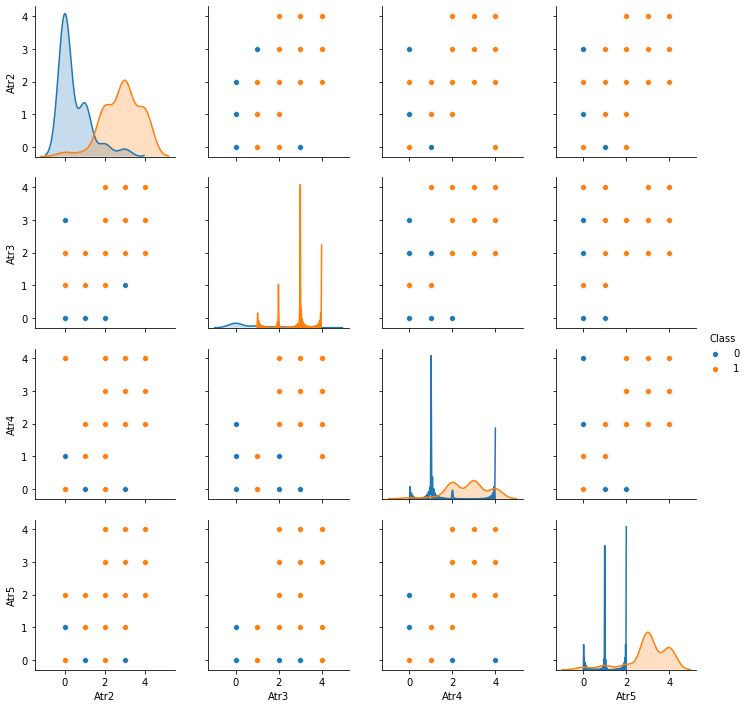

In [6]:
#plot different attributes to see if they are somehow correlated to class
import seaborn as sns
sns.pairplot(divorce, hue = 'Class', vars = ['Atr2','Atr3','Atr4','Atr5'])

In [7]:
#define the Y as the last column in the dataset
Y = divorce.iloc[:,54].values
Y.shape

(170,)

In [8]:
#define the X as all of the questions in the dataset
X = divorce.iloc[:,0:54].values
X.shape

(170, 54)

In [10]:
#define test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(127, 54)
(43, 54)
(127,)
(43,)


In [11]:
#use the SVC tool to fit a line in my training data
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, gamma = 'auto')
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
#give the model test data and let it predict Y
classprediction = classifier.predict(X_test)

In [13]:
#The confusion matrix shows that of the 24 divorced couples, the model predicted that 2 of them were married. Of the 19 married
#couples, the model predicted that 19 were married.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classprediction)
cm

array([[22,  0],
       [ 2, 19]], dtype=int64)

In [14]:
#The accuracy was 95%
from sklearn import metrics
howgood = metrics.accuracy_score(Y_test, classprediction)
howgood

0.9534883720930233

# Discussion Part 1

The results of part one show that the SVM model was able to accurately determine the class 95% of the time. This is pretty good, but how could it be made better? This model uses all of the questions that were asked to the participants. What if all of the questions do not have clear definition between classes? What if the accuracy could be improved if only the most significant questions were used in the model. In part two, I will determine which questions were the most significant in determining if the couple was divorced or married. I will then re-run the model to see if I can improve the accuracy. 

In [29]:
#Use a statistical test to determine the chi-squared values for each attribute
from sklearn.feature_selection import SelectKBest, chi2
fit = SelectKBest(chi2).fit(X, Y)

In [30]:
#List the chi-squared values for each of the attributes
fit.scores_

array([186.88480635, 148.56466779, 124.8627261 , 173.30274965,
       233.04633622,  32.75643306,  82.00000659, 210.31692828,
       234.06994829, 151.00039875, 229.05224166, 166.52922248,
       143.62384644, 181.53125868, 198.3981008 , 203.43346216,
       230.17948081, 232.75429018, 239.13623049, 230.19977316,
       191.86480329, 193.44124407, 218.1977321 , 178.2584123 ,
       178.36037117, 194.78408817, 193.88834836, 199.83538605,
       228.6746802 , 195.78990635, 135.61506121, 148.6996124 ,
       221.26349735, 164.94121933, 255.47433633, 267.48902924,
       177.74183863, 213.48922018, 192.1763137 , 256.79032157,
       200.95660156, 106.1025706 ,  36.41244162, 177.31870197,
        46.17412453,  24.49837459,  80.75414852,  30.63950399,
        88.92747768,  78.33819472,  52.00261993,  62.11258551,
        86.45775237, 152.05241949])

In [31]:
#From the list above, I chose the top 6 scores
#Now, re-run the analysis with only the 6 most significant features
new_divorce = divorce[['Atr3','Atr7','Atr17','Atr33','Atr34','Atr38','Class']]
new_divorce.head()

,Atr3,Atr7,Atr17,Atr33,Atr34,Atr38,Class
0,4,0,0,1,2,1,1
1,4,0,4,2,3,4,1
2,2,2,3,1,1,1,1
3,3,3,3,2,2,3,1
4,1,0,1,1,1,0,1


In [32]:
#define new X
new_X = new_divorce.iloc[:,0:6].values
new_X

array([[4, 0, 0, 1, 2, 1],
       [4, 0, 4, 2, 3, 4],
       [2, 2, 3, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [33]:
#define new Y
new_Y = new_divorce.iloc[:,6].values
new_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
#Re-define training and test sets
from sklearn.model_selection import train_test_split
newX_train, newX_test, newY_train, newY_test = train_test_split(new_X, new_Y, test_size = 0.25, random_state = 0)
print(newX_train.shape)
print(newX_test.shape)
print(newY_train.shape)
print(newY_test.shape)

(127, 6)
(43, 6)
(127,)
(43,)


In [35]:
#fit the model with the new data
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(newX_train, newY_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
#test out the new model
newclassprediction = classifier.predict(newX_test)

In [37]:
#the matrix shows that the results have been improved
from sklearn.metrics import confusion_matrix
newcm = confusion_matrix(newY_test, newclassprediction)
newcm

array([[22,  0],
       [ 1, 20]], dtype=int64)

In [38]:
#the accuracy is now 97.7%
from sklearn import metrics
newhowgood = metrics.accuracy_score(newY_test, newclassprediction)
newhowgood 

0.9767441860465116

# Discussion part 2

In part 2, I was able to improve my accuracy to 97.7% by weeding out the questions that were not significant to the class. Now, I have a model that has almost 98% accuracy in prediction divorce based on only 6 quetions. I used chi squared to weed out the features that were not signigicant to the class. The chi-squared test measures dependance between variables, so it weeds out the feautures that are most likely to be independant of class, so I should not used them in the classification model. 

Discussion Question: 
Additionally, answer this question in your notebook:  In your own words, describe the concepts of bias, variance, and overfitting and how they could be used to evaluate models we build in this class.
- Bias is essentially the metric that shows how well a line can capture the true relationship between two variables. Variance is about how well this line performs with different data sets. We could use these metrics in class to evaluate the quality of the models. A high quality model has low bias and low variability. Overfitting is when you drive the bias really low, but drive the variance very high. The low bias means the line can fit the data set very well, but when another dataset is introduced, it does very bad at fitting. If we see a model that has low bias but high variance, then we know that the model is probably over fit. Ideally, we want both the variance and bias to be low.